# Лабораторная работа 4

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.fft import fft, fftfreq
import math
from scipy import integrate

На вход передатчика подается сигнал косинуса с частотами 50, 150 и 450 Гц. Определите спектр
сигнала с помощью стандартной функции быстрого преобразования Фурье.

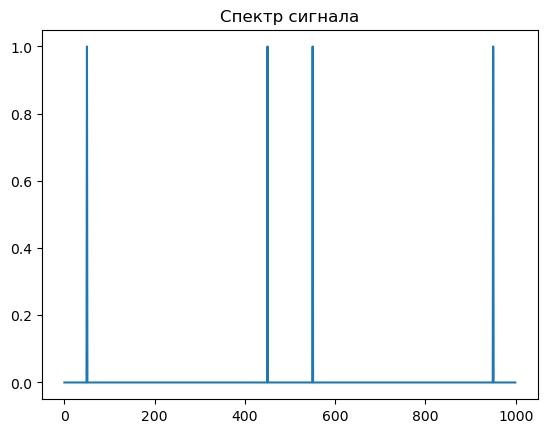

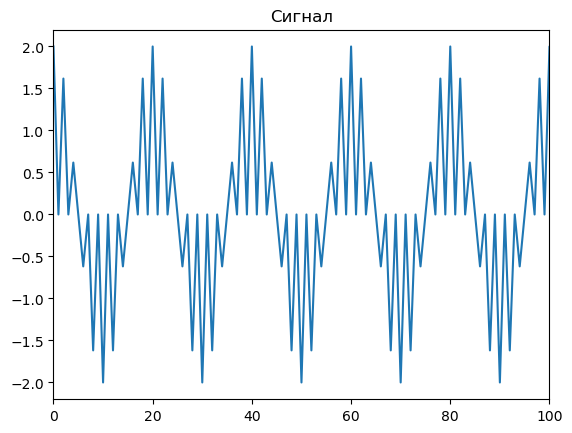

In [74]:
N = 1000 # Количество отсчетов
T = 1.0/10000 

wc = 120 # - частота среза
w  = 50 # - частота
sigm = w/wc

# частота сигнала
f1 = 50 
f2 = 150
f3 = 450

x = np.linspace(0.0, 1,N, endpoint=False)
X=np.arange(len(x))
y50=np.cos(f1 * 2.0*np.pi*x)
y =  np.cos(f1 * 2.0*np.pi*x) + 0*np.cos(f2 * 2.0*np.pi*x)  + np.cos(f3 * 2.0*np.pi*x)#
yff = np.fft.fft(y)

plt.plot(X,np.abs(yff)/500)
plt.title('Спектр сигнала')
plt.show()

plt.plot(X,y)
plt.title('Сигнал')
plt.xlim(0,100)
plt.show()

Построить фильтр Баттерворта нижних частот 2-го порядка (ФНЧ) к сигналу,

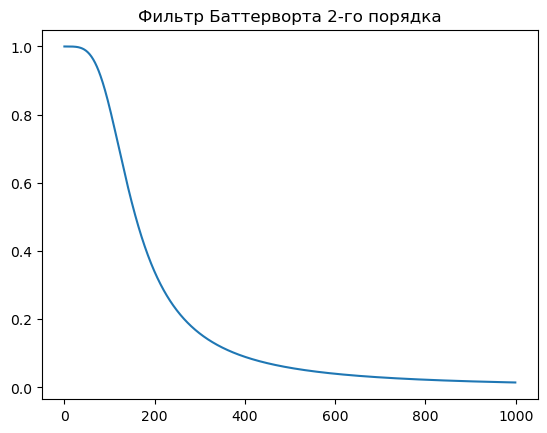

In [75]:
wc = 120 # - частота среза
w  = 50 # - частота

def H(w, wc):
    omeg = (wc**2)/(-(w**2) + 1j*math.sqrt(2)*w*wc + wc**2)
    return omeg   

omega = H(X, wc)

plt.plot(X, np.abs(omega))
plt.title('Фильтр Баттерворта 2-го порядка')
plt.show()

Построить графики исходного и отфильтрованного сигнала, спектра сигнала и фильтра
Баттерворта.

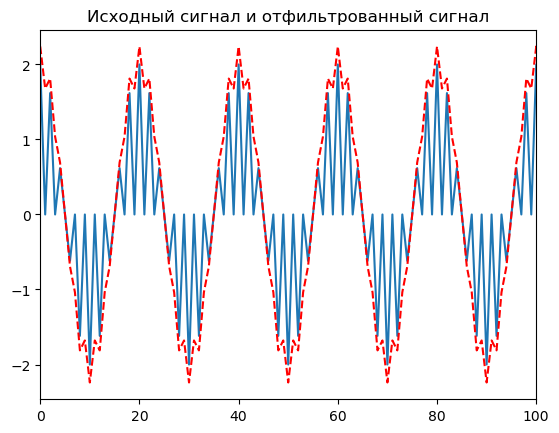

In [76]:
plt.plot(X,y)
yomega = yff * abs(H(X, wc))
yomega2 = np.fft.ifft(yomega)
plt.plot(X, 4*yomega2,'r--')
plt.xlim(0,100)
plt.title('Исходный сигнал и отфильтрованный сигнал')
plt.show()

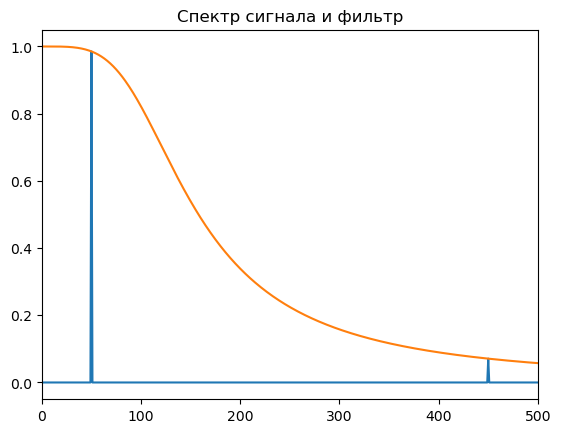

In [77]:
#спектр сигнала
plt.plot(X,np.abs(yomega)/500)
plt.xlim(0,500)
#фильтр Баттерворта
X=np.arange(len(x))
omega = H(X, wc)
plt.title('Спектр сигнала и фильтр')
plt.plot(X, abs(omega))
plt.show()

Построить фильтр высоких частот (ФВЧ) к сигналу.
Построить графики исходного и отфильтрованного сигнала, спектра сигнала и фильтра ФНЧ.

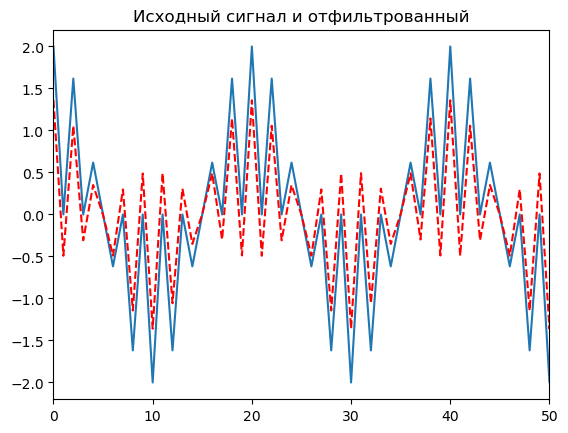

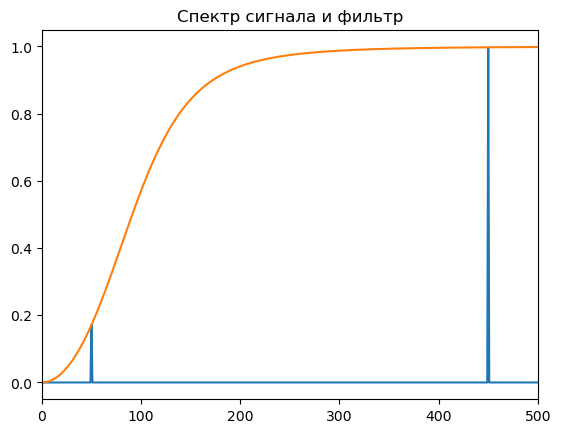

In [80]:
x = np.linspace(0.0, 1,1000, endpoint=False)
X=np.arange(len(x))
#фвч баттерворта
def FVCH(w, wc):
    omeg = (w**2)/(-wc**2  + 1j*math.sqrt(2)*w*wc + w**2 )
    return omeg    

fvch = FVCH(X, wc)
yfilted = np.fft.fft(y) * fvch
plt.plot(X,y)
plt.plot(X,np.fft.ifft(yfilted),'r--')
plt.xlim(0,50)
plt.title('Исходный сигнал и отфильтрованный')
plt.show()

#спектр сигнала
plt.plot(X,np.abs(yfilted)/500)
plt.xlim(0,500)

#фильтр Баттерворта
X=np.arange(len(X))
omega = H(X, wc)

plt.plot(X, abs(fvch))
plt.title('Спектр сигнала и фильтр')
plt.show()


Построить полосовой фильтр и заграждающий фильтр (ПФ/ЗФ) настроенный на частоту 150Гц.
Построить графики исходного и отфильтрованного сигнала, спектра сигнала и фильтров ПФ/ЗФ.

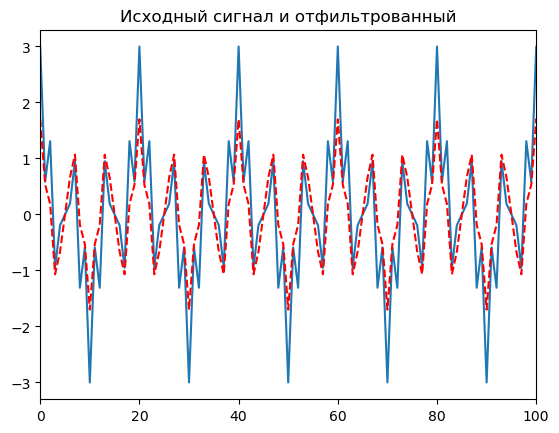

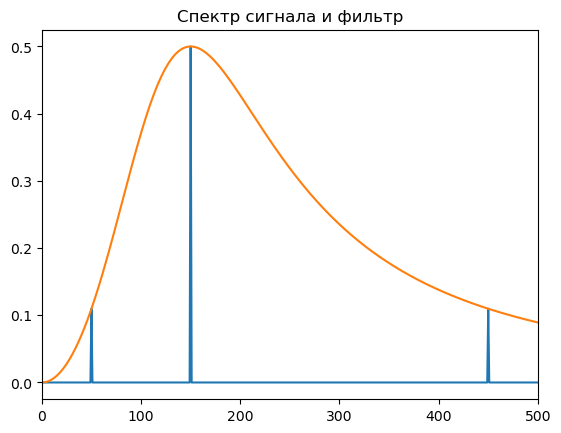

In [82]:
wcc = 150
y =  np.cos(f1 * 2.0*np.pi*x) + np.cos(f2 * 2.0*np.pi*x)  + np.cos(f3 * 2.0*np.pi*x)#

yff = np.fft.fft(y)

def PF(w, wcc):
    omeg = H(w,wcc) * FVCH(w,wcc)
    return omeg

pf = PF(X, wcc)
plt.plot(X,y)

yfilted = pf * yff
plt.plot(X,(-4)*np.fft.ifft(yfilted),'r--')
plt.xlim(0,100)
plt.title('Исходный сигнал и отфильтрованный')
plt.show()

#отфильтрованный спектр сигнала
plt.plot(X,abs(yfilted)/500)
plt.plot(X,abs(pf))
plt.xlim(0,500)
plt.title('Спектр сигнала и фильтр')
plt.show()


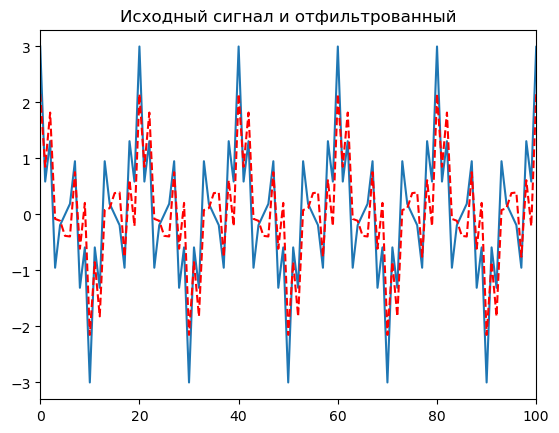

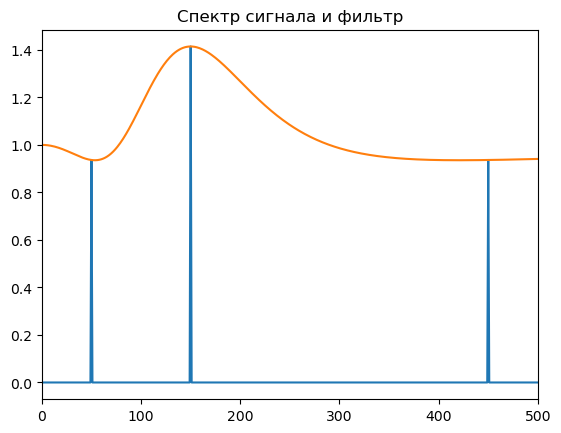

In [83]:
#Заграждающий фильтр
wc2 = 150# частота среза
w  = 50# частота

def BoardF(w, wc2):
    omeg = H(w,wcc) + FVCH(w,wcc)
    return omeg

pf = BoardF(X, wc2)
plt.plot(X,y)

yfilted = pf * yff
plt.plot(X,np.fft.ifft(yfilted),'r--')
plt.xlim(0,100)
plt.title('Исходный сигнал и отфильтрованный')
plt.show()

#отфильтрованный спектр сигнала
plt.plot(X,abs(yfilted)/500)
plt.plot(X,abs(pf))
plt.xlim(0,500)
plt.title('Спектр сигнала и фильтр')
plt.show()

Постройте фильтр Баттерворта 3-го и 4-го порядка с автоматическим определением полюсов фильтра. 

In [60]:
N = 1000 
T = 1.0/10000
wc = 70
w  = 50
coeff = [1, 0, 0, 0, 0, 0, 0, 0, 1]  
res = np.roots(coeff)
y =  np.cos(f1 * 2.0*np.pi*x) + 0*np.cos(f2 * 2.0*np.pi*x)  + np.cos(f3 * 2.0*np.pi*x)#
x = np.linspace(0.0, 1,N, endpoint=False)
X=np.arange(len(x))

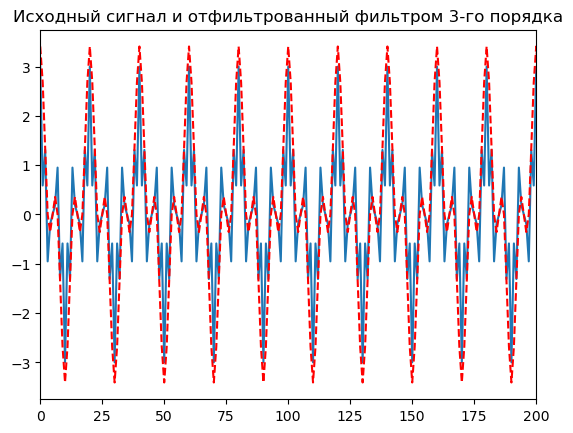

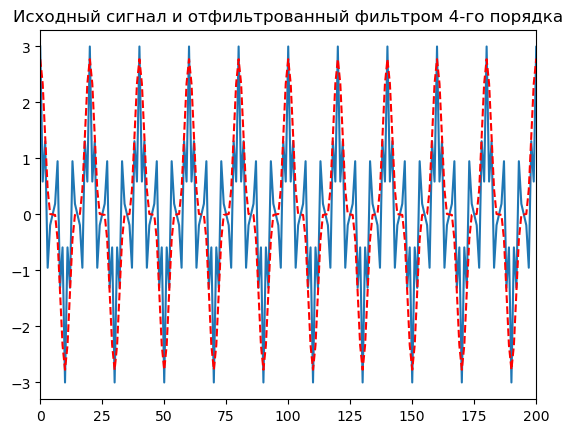

In [84]:
sublist3 = res[0:3]
sublist4 = res[0:4]


def buttern_4(w, wc, n):
    pr = 1
    for i in range (0,n):
        pr = pr * (1j*(w/wc) - sublist4[i])
    omeg = 1 / pr
    return omeg

def buttern_3(w, wc, n):
    pr = 1
    for i in range (0,n):
        pr = pr * (1j*(w/wc) - sublist3[i])
    omeg = 1 / pr
    return omeg

b3 = buttern_3(X, wc,3)
b4 = buttern_4(X, wc,4)

yfilted3 = abs(b3 * np.fft.fft(y))
yfilted4 = abs(b4 * fft(y))
plt.plot(X,y)
plt.plot(X,np.fft.ifft(yfilted3)*3, 'r--')
plt.xlim(0,200)
plt.title('Исходный сигнал и отфильтрованный фильтром 3-го порядка')
plt.show()
plt.plot(X,y)
plt.plot(X,np.fft.ifft(yfilted4)*4, 'r--')
plt.xlim(0,200)
plt.title('Исходный сигнал и отфильтрованный фильтром 4-го порядка')
plt.show()

Попробуйте добавить шум к исходному сигналу, посмотрите как происходит фильтрация
для зашумленного сигнала.

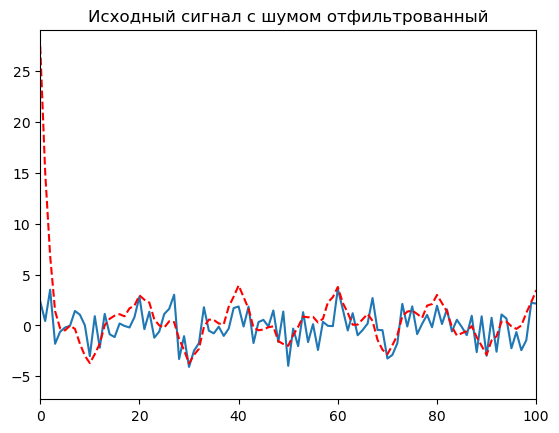

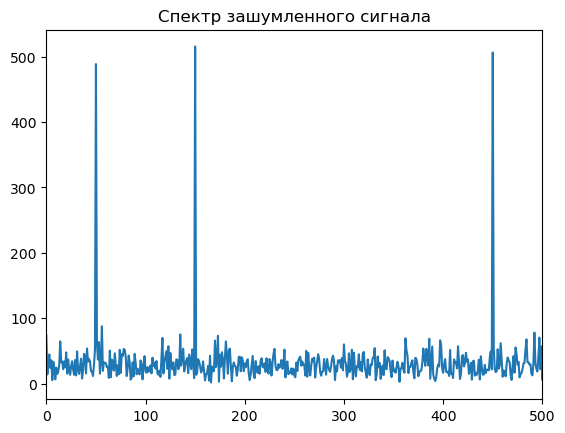

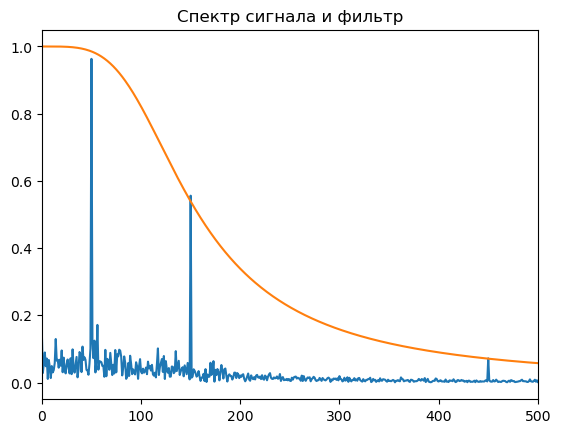

In [85]:
y =  np.cos(f1 * 2.0*np.pi*x) + np.cos(f2 * 2.0*np.pi*x)  + np.cos(f3 * 2.0*np.pi*x)#
y_noise = np.random.normal(0,1,X.shape)
f_noise = y_noise + y
yff_noise = fft(f_noise)
f_noise_filt = yff_noise*H(X, wc)

#с шумом
plt.plot(X,f_noise)
#сигнал с фильтром
plt.plot(X, 4*np.fft.ifft(abs(f_noise_filt)),'r--')
plt.xlim(0,100)

plt.title('Исходный сигнал с шумом отфильтрованный')
plt.show()


#спектр
plt.plot(X, abs(yff_noise))
plt.xlim(0,500)
plt.title('Спектр зашумленного сигнала')
plt.show()

#спектр с фильтром
plt.plot(X, abs(f_noise_filt)/500)
plt.plot(X,abs(H(X,wc)))
plt.xlim(0,500)

plt.title('Спектр сигнала и фильтр')
plt.show()